## LetsGrowMore
## Task - Develop A Neural Network That Can Read Handwriting
## By : DHRUPAL KALAL

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import *
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from keras.datasets import mnist
import random
from numpy import argmax

Using TensorFlow backend.


In [2]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

### 60,000 images as input data with shape 28 x 28 each

In [3]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

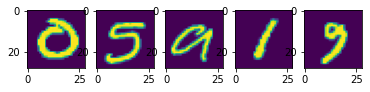

In [4]:
# sample images
for i in range (1,6):
    plt.subplot(1,5,i)
    plt.imshow(x_train[random.randint(0,5000)])

In [5]:
x_train = x_train.reshape( (x_train.shape[0] , x_train.shape[1] , x_train.shape[2] , 1) )
x_test = x_test.reshape( (x_test.shape[0] , x_test.shape[1] , x_test.shape[2] , 1) )
x_train =  x_train.astype('float32') / 255.0
x_test =  x_test.astype('float32') / 255.0

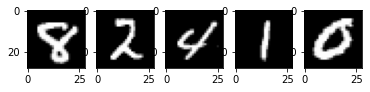

In [6]:
for i in range (1,6):
    plt.subplot(1,5,i)
    plt.imshow(x_train[random.randint(0,5000)] , cmap ="gray")

In [7]:
model= Sequential()
model.add(Conv2D(32, (3,3) , activation='relu' , input_shape=(28,28,1)))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(48, (3,3) , activation='relu' ))
model.add(MaxPool2D((2,2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(500,activation='relu' ))
model.add(Dense(10,activation='softmax' ))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 48)        13872     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 48)          0         
_________________________________________________________________
dropout (Dropout)            (None, 5, 5, 48)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1200)              0         
_________________________________________________________________
dense (Dense)                (None, 500)               6

In [8]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train, y_train, epochs=10, verbose =1 , batch_size=128, validation_split=0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 5s 90us/sample - loss: 0.2496 - accuracy: 0.9222 - val_loss: 0.0601 - val_accuracy: 0.9823
Epoch 2/10
54000/54000 [==============================] - 3s 60us/sample - loss: 0.0861 - accuracy: 0.9735 - val_loss: 0.0402 - val_accuracy: 0.9882
Epoch 3/10
54000/54000 [==============================] - 3s 59us/sample - loss: 0.0624 - accuracy: 0.9806 - val_loss: 0.0357 - val_accuracy: 0.9888
Epoch 4/10
54000/54000 [==============================] - 3s 58us/sample - loss: 0.0502 - accuracy: 0.9843 - val_loss: 0.0292 - val_accuracy: 0.9922
Epoch 5/10
54000/54000 [==============================] - 3s 58us/sample - loss: 0.0424 - accuracy: 0.9864 - val_loss: 0.0321 - val_accuracy: 0.9915
Epoch 6/10
54000/54000 [==============================] - 3s 59us/sample - loss: 0.0377 - accuracy: 0.9878 - val_loss: 0.0300 - val_accuracy: 0.9923
Epoch 7/10
54000/54000 [==============================] -

In [9]:
loss,acc = model.evaluate(x_test,y_test,verbose=0)
print("accuracy = ",acc*100, "%")

accuracy =  99.32000041007996 %


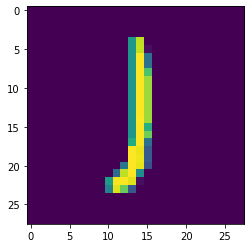

In [10]:
n = random.randint(0,5000)
test_img = x_train[n]
plt.imshow(test_img)
plt.show()

In [11]:
test_img = test_img.reshape(1,28,28,1 ) 
#test_img=  test_img.astype('float32') / 255.0

p = model.predict([test_img])
print("prediction = {} ".format(argmax(p)))

prediction = 1 
